In [1]:
# Import main library
from StegoPack import Image, Payload

In [2]:
# Helper functions to demo via Jupyter Notebook

import os
folder = "demo_files"

def encode(image, payload):
    if payload.dataSize > image.storageL2:
        print("Can't encode '{}' into '{}'.".format(payload.filename, image.filename))
        return

    if payload.dataSize <= image.storageL0:
        print("Encoding using L0...")
        payload.level = 0
    elif payload.dataSize <= image.storageL1:
        print("Encoding using L1...")
        payload.level = 1
    else:
        print("Encoding using L2...")
        payload.level = 2

    image.encodePayload(payload)

def decode(filename):
    image = Image(os.path.join(folder, filename))
    payloadFilename, payloadLevel = image.hasPayload()
    if payloadFilename:
        print("File '{}' found encoded as L{}!".format(payloadFilename, payloadLevel))
        print("Decoding...")
        payload = image.decodePayload(payloadLevel)
        payload.saveFile(os.path.join(folder, "decoded"))
        print("Saved to '{}'!".format(os.path.join(folder, "decoded", payload.filename)))
    else:
        print("No payload found.")
        
import imageio
import matplotlib.pyplot as plt
def pltshow(a, b, figsize=None):
    plt.figure(figsize=figsize)
    plt.subplot(121)
    plt.imshow(imageio.imread(os.path.join(folder, a)))
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(imageio.imread(os.path.join(folder, b)))
    plt.axis('off')
    plt.show()

import hashlib
def md5(fname):
    hash_md5 = hashlib.md5()
    with open(os.path.join(folder, fname), "rb") as f:
        for chunk in iter(lambda: f.read(4096), b""):
            hash_md5.update(chunk)
    return hash_md5.hexdigest()

# Create demo subdirectories
try: os.mkdir(os.path.join(folder, "encoded"))
except: pass
try: os.mkdir(os.path.join(folder, "decoded"))
except: pass

## 1-bit LSB ("L0") Demo

### Encoding

Image: `corgi-599x799.jpg`

Payload: `payloads/faustao.png`

Output (Image w/ Payload): `encoded/corgi-L0.png`

'demo_files\corgi-599x799.jpg' has file size 66.2 KB and dimensions 599x799 (478601 pixels)
Payload storage capacities (including payload header):
  Level 0: up to 175.3 KB
  Level 1: 175.3 KB to 350.5 KB
  Level 2: 350.5 KB to 701.1 KB
'faustao.png' needs 97.1 KB of payload storage.
Encoding using L0...


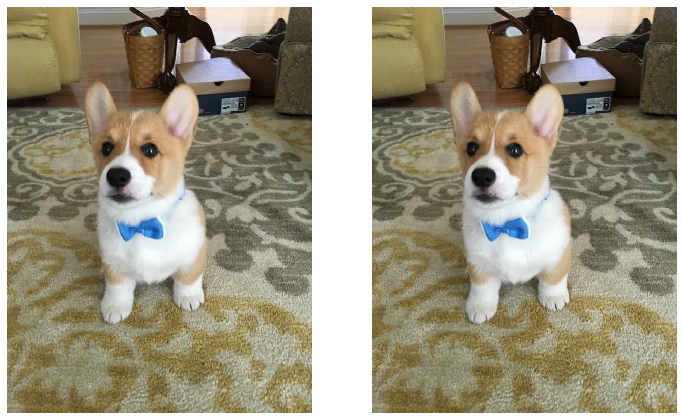

In [3]:
image = Image(os.path.join(folder, "corgi-599x799.jpg"))
image.printInfo()

payload = Payload(os.path.join(folder, "payloads", "faustao.png"))
payload.printInfo()

encode(image, payload)
image.saveFile(os.path.join(folder, "encoded", "corgi-L0.png"))

pltshow("corgi-599x799.jpg", os.path.join("encoded", "corgi-L0.png"), figsize=(12, 8))

### Decoding

Image w/ Payload: `encoded/corgi-L0.png`

Output (Payload): `decoded/faustao.png`

In [4]:
decode(os.path.join("encoded", "corgi-L0.png"))

print("Original file:", md5(os.path.join("payloads", "faustao.png")))
print("Decoded file:", md5(os.path.join("decoded", "faustao.png")))

File 'faustao.png' found encoded as L0!
Decoding...
Saved to 'demo_files\decoded\faustao.png'!
Original file: caaf05c27caa4bbf0a64f369fc7c94c6
Decoded file: caaf05c27caa4bbf0a64f369fc7c94c6


## 4-bit LSB ("L2") Demo

### Encoding

Image: `randall-2560x1372.png`

Payload: `payloads/pier39.mp4`

Output (Image with Payload): `encoded/randall-L2.png`

'demo_files\randall-2560x1372.png' has file size 1.2 MB and dimensions 2560x1372 (3512320 pixels)
Payload storage capacities (including payload header):
  Level 0: up to 1.3 MB
  Level 1: 1.3 MB to 2.5 MB
  Level 2: 2.5 MB to 5.0 MB
'pier39.mp4' needs 3.2 MB of payload storage.
Encoding using L2...


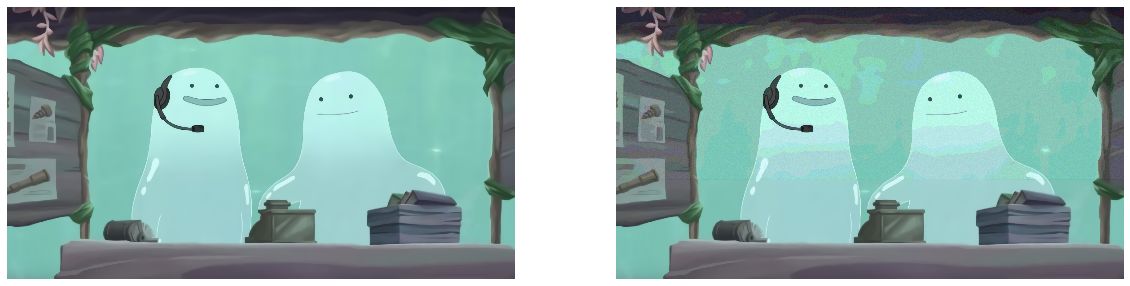

In [5]:
image = Image(os.path.join(folder, "randall-2560x1372.png"))
image.printInfo()

payload = Payload(os.path.join(folder, "payloads", "pier39.mp4"))
payload.printInfo()

encode(image, payload) # May take a couple seconds...
image.saveFile(os.path.join(folder, "encoded", "randall-L2.png"))

pltshow("randall-2560x1372.png", os.path.join("encoded", "randall-L2.png"), figsize=(20, 5))

### Decoding

Image with Payload: `encoded/randall-L2.png`

Output (Payload): `decoded/pier34.mp4`

In [6]:
decode(os.path.join("encoded", "randall-L2.png")) # May take a couple seconds...

print("Original file:", md5(os.path.join("payloads", "pier39.mp4")))
print("Decoded file:", md5(os.path.join("decoded", "pier39.mp4")))

File 'pier39.mp4' found encoded as L2!
Decoding...
Saved to 'demo_files\decoded\pier39.mp4'!
Original file: 2540a955a03ae6ab4d9b2c944ae888f8
Decoded file: 2540a955a03ae6ab4d9b2c944ae888f8
